# Tiền xử lý dữ liệu

In [ ]:
# --- CELL 1: CÀI ĐẶT THƯ VIỆN ---
import os
import sys
import pandas as pd
import re

# 1. CẤU HÌNH ĐƯỜNG DẪN
folder_name = 'data_final'
work_dir = os.path.join('.', folder_name)

# Kiểm tra xem thư mục có tồn tại không
if not os.path.exists(work_dir):
    print(f"[WARNING] Chưa thấy thư mục '{folder_name}'. Đang tạo mới...")
    os.makedirs(work_dir)
    print(f"[INFO] Đã tạo thư mục '{folder_name}'. Hãy upload file dữ liệu vào trong thư mục này!")
else:
    print(f"[INFO] Đã tìm thấy thư mục: {work_dir}")

# 2. CÀI ĐẶT THƯ VIỆN
!pip install pyvi openpyxl pandas > /dev/null

import unicodedata
try:
    from pyvi import ViTokenizer
    print("[SUCCESS] Da import thanh cong thu vien PyVi.")
except ImportError:
    print("[ERROR] Loi cai dat PyVi. Vui long chay lai Cell nay.")

[INFO] Đã tìm thấy thư mục: ./data_final
[SUCCESS] Da import thanh cong thu vien PyVi.


In [ ]:
# --- CELL 2: TỰ ĐỘNG TẠO TỪ ĐIỂN VÀ THÊM BỘ LỌC ---

# 1. DANH SÁCH TỪ KHÓA RÁC
JUNK_KEYWORDS = [
    "còn hàng", "con hang", "hết hàng", "het hang", "về hàng", "ve hang",
    "có hàng", "co hang", "còn ko", "con ko", "còn k", "con k",
    "còn máy", "con may", "còn không", "con khong", "còn k ạ",
    "còn ở", "con o", "có ở", "co o", "chi nhánh", "cơ sở",
    "con hang", "con hong", "con kh", "con k", "còn hông",
    "hàn không", "han khong", "hàn k", "han k",
    "hà nội", "hcm", "hồ chí minh", "tphcm", "đà nẵng", "cần thơ", "hải phòng",
    "bến cát", "bình dương", "long an", "tây ninh", "lạng sơn", "bắc giang",
    "đồng nai", "biên hòa", "vũng tàu", "quận", "huyện", "tỉnh",
    "trả góp", "tra gop", "góp", "lãi suất", "trả trước", "duyệt hồ sơ",
    "ship", "giao hàng", "giao hang", "đặt hàng", "dat hang", "đặt cọc",
    "giá", "gia bao nhieu", "bao nhiêu", "nhieu", "triệu", "vnd", "đắt", "rẻ", "xin giá",
    "hủy", "bom hàng", "đổi trả", "bảo hành", "bấm nhầm",
    "tư vấn", "liên hệ", "sđt", "số điện thoại", "gọi", "alo", "zalo", "szalo",
    "check", "kiểm tra", "cho hỏi", "mình hỏi", "shop ơi", "ad ơi", "rep",
    "rep ib", "ib", "inbox",
    "nên mua", "so sánh", "hay là", "có sẵn", "tiếng việt không", "khe cắm"
]

# 2. TỪ ĐIỂN TEENCODE & CHÍNH TẢ
TEENCODE_DICT = {
    "ko": "không", "k": "không", "kh": "không", "khg": "không", "hok": "không", "hong": "không", "hông": "không", "hem": "không",
    "đc": "được", "dc": "được", "dk": "được", "ok": "tốt", "oke": "tốt", "oki": "tốt", "good": "tốt",
    "ak": "ạ", "ah": "ạ", "az": "ạ", "nhas": "nhé", "nha": "nhé",
    "sp": "sản_phẩm", "dt": "điện_thoại", "đt": "điện_thoại", "mobile": "điện_thoại",
    "nv": "nhân_viên", "shop": "cửa_hàng", "ad": "admin",
    "rep": "trả_lời", "ib": "nhắn_tin", "ship": "giao_hàng",
    "wed": "web", "frire": "fire", "hàn": "hàng"
}

# 3. TỰ ĐỘNG QUÉT TÊN SẢN PHẨM TỪ FILE DATA (Trong thư mục data_final)
CUSTOM_DICT = [
    "iphone 16 pro max", "iphone 16 pro", "iphone 16",
    "iphone 15 pro max", "iphone 15 pro", "iphone 15",
    "samsung galaxy", "xiaomi", "oppo", "vivo", "realme", "redmi",
    "nubia neo", "tecno spark", "infinix", "macbook", "ipad"
]

# Tìm file trong work_dir
data_files = [f for f in os.listdir(work_dir) if 'cellphones_reviews_final' in f and (f.endswith('.xlsx') or f.endswith('.csv'))]

if data_files:
    data_path = os.path.join(work_dir, data_files[0])
    try:
        print(f"[INFO] Dang quet ten san pham tu file: {data_files[0]}")
        if data_path.endswith('.csv'):
            df_temp = pd.read_csv(data_path)
        else:
            df_temp = pd.read_excel(data_path)

        if 'product' in df_temp.columns:
            raw_products = df_temp['product'].dropna().unique().tolist()
            for prod in raw_products:
                clean_name = str(prod).lower()
                clean_name = clean_name.replace("đánh giá", "").replace("chính hãng", "")
                clean_name = re.sub(r'\|\s*vn\/a', '', clean_name)
                clean_name = clean_name.split('-')[0].strip()
                if len(clean_name) > 3:
                    CUSTOM_DICT.append(clean_name)

            if 'brand' in df_temp.columns:
                brands = df_temp['brand'].dropna().unique().tolist()
                CUSTOM_DICT.extend([str(b).lower() for b in brands])

            print(f"[SUCCESS] Da them {len(CUSTOM_DICT)} tu vung san pham.")
    except Exception as e:
        print(f"[WARNING] Loi quet san pham: {e}")
else:
    print(f"[WARNING] Chua tim thay file du lieu trong thu muc '{work_dir}'.")

CUSTOM_DICT = sorted(list(set(CUSTOM_DICT)), key=len, reverse=True)

# 4. STOPWORDS
STOPWORDS = {
    "thì", "là", "mà", "bị", "của", "được", "có", "cho", "với", "về",
    "những", "các", "nhé", "nha", "ạ", "ơi", "này", "rồi", "thôi", "vậy",
    "em", "mình", "tôi", "bạn", "anh", "chị", "admin", "ad",
    "shop", "cellphones", "cửa_hàng", "mua", "dùng", "máy", "điện_thoại", "sản_phẩm"
}

print(f"[INFO] Da cau hinh xong Dictionary & Filter.")

[INFO] Dang quet ten san pham tu file: cellphones_reviews_final.xlsx
[SUCCESS] Da them 448 tu vung san pham.
[INFO] Da cau hinh xong Dictionary & Filter.


In [ ]:
# --- CELL 3: HÀM XỬ LÝ (PROCESS PIPELINE) ---

def is_junk_comment(text):
    if not text: return True
    text_lower = str(text).lower()
    if len(text_lower.split()) < 3: return True
    if text_lower.strip().endswith('?'): return True

    # Lọc tên người
    common_surnames = ["nguyen ", "nguyễn ", "tran ", "trần ", "le ", "lê ", "pham ", "phạm ", "hoang ", "hoàng "]
    if any(text_lower.startswith(name) for name in common_surnames) and len(text_lower.split()) <= 4:
        return True

    for keyword in JUNK_KEYWORDS:
        if keyword in text_lower:
            return True
    return False

def apply_custom_dict(text):
    for word in CUSTOM_DICT:
        if word in text:
            text = text.replace(word, word.replace(" ", "_"))
    return text

def process_text_pipeline(text):
    if not text or pd.isna(text): return ""
    text = str(text)
    text = unicodedata.normalize('NFC', text)
    text = re.sub(r'<[^>]*>', ' ', text)
    text = re.sub(r'https?://\S+', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [TEENCODE_DICT.get(t, t) for t in tokens]
    text = ' '.join(tokens)
    text = apply_custom_dict(text)
    try:
        text = ViTokenizer.tokenize(text)
    except: pass
    text = re.sub(r'[^\w\s_]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS]
    return ' '.join(tokens)

print("[INFO] Da dinh nghia xong ham xu ly.")

[INFO] Da dinh nghia xong ham xu ly.


In [ ]:
# --- CELL 4: ĐỌC DỮ LIỆU TỪ THƯ MỤC data_final ---

# Quét file trong thư mục work_dir (data_final)
data_files = [f for f in os.listdir(work_dir) if 'cellphones_reviews' in f and (f.endswith('.xlsx') or f.endswith('.csv'))]

if data_files:
    # Tạo đường dẫn đầy đủ: data_final/tên_file.xlsx
    input_path = os.path.join(work_dir, data_files[0])

    print(f"[INFO] Dang doc file: {input_path}")
    try:
        if input_path.endswith('.csv'):
            df = pd.read_csv(input_path)
        else:
            df = pd.read_excel(input_path)
        print(f"[SUCCESS] Doc file thanh cong! Tong so dong: {len(df)}")
    except Exception as e:
        print(f"[ERROR] Loi khi doc file: {e}")
else:
    print(f"[ERROR] KHONG TIM THAY FILE trong thu muc '{work_dir}'!")
    print("Hay chac chan ban da tao thu muc 'data_final' va upload file vao do.")

[INFO] Dang doc file: ./data_final/cellphones_reviews_final.xlsx
[SUCCESS] Doc file thanh cong! Tong so dong: 3472


In [ ]:
# --- CELL 5: CHẠY QUY TRÌNH TIỀN XỬ LÝ ---

if 'df' in locals():
    print("[INFO] Bat dau xu ly...")
    initial_len = len(df)

    if 'content' in df.columns:
        # 1. Lọc Admin
        df = df[~df['content'].str.contains('CellphoneS xin chào|CellphoneS', case=False, na=False)]

        # 2. Lọc rác
        print("[INFO] Dang loc bo cac cau hoi tu van, mua hang...")
        df = df[~df['content'].apply(is_junk_comment)]
        filtered_len = len(df)
        print(f"[INFO] Da loc bo {initial_len - filtered_len} dong rác/spam.")

        # 3. NLP
        print("[INFO] Dang chay chuan hoa NLP...")
        df['content_cleaned'] = df['content'].apply(process_text_pipeline)

        # 4. Lọc rỗng
        df_clean = df[df['content_cleaned'].str.strip().str.len() > 1].copy()
        final_len = len(df_clean)

        print(f"[SUCCESS] Hoan tat! So dong sach con lai: {final_len}")
    else:
        print("[ERROR] File du lieu khong co cot 'content'.")
else:
    print("[ERROR] Chua co du lieu de xu ly.")

[INFO] Bat dau xu ly...
[INFO] Dang loc bo cac cau hoi tu van, mua hang...
[INFO] Da loc bo 1414 dong rác/spam.
[INFO] Dang chay chuan hoa NLP...
[SUCCESS] Hoan tat! So dong sach con lai: 2057


In [ ]:
# --- CELL 6: LƯU KẾT QUẢ ---

if 'df_clean' in locals():
    print("\n--- KET QUA SAU KHI XU LY ---")
    print(df_clean[['content', 'content_cleaned']].sample(5))

    # Lưu vào trong folder data_final luon
    output_filename = 'data_preprocessed.xlsx'
    output_path = os.path.join(work_dir, output_filename)

    try:
        df_clean.to_excel(output_path, index=False)
        print(f"\n[SUCCESS] Da luu file tai: {output_path}")
    except Exception as e:
        print(f"[ERROR] Khong the luu file: {e}")


--- KET QUA SAU KHI XU LY ---
                                    content  \
1818               Rất hài lòng về sản phẩm   
2598  Niceeeee Niceeeee Niceeeee Niceeeee x   
378             chưa xài nhưng thấy rất đẹp   
2126    Nhân viên tuệ vấn nhiệt tình, toits   
194                         Sản phẩm tốt ❤️   

                            content_cleaned  
1818                           rất hài_lòng  
2598  niceeeee niceeeee niceeeee niceeeee x  
378             chưa xài nhưng thấy rất đẹp  
2126     nhân_viên tuệ vấn nhiệt_tình toits  
194                                     tốt  

[SUCCESS] Da luu file tai: ./data_final/data_preprocessed.xlsx


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from wordcloud import WordCloud
from collections import Counter

# 1. LOAD DỮ LIỆU
if 'df_clean' not in locals():
    processed_path = os.path.join(work_dir, 'data_preprocessed.xlsx')
    raw_path = os.path.join(work_dir, 'cellphones_reviews_final.xlsx')

    if os.path.exists(processed_path):
        df_clean = pd.read_excel(processed_path)
        # Đảm bảo cột nội dung là chuỗi
        if 'content_cleaned' in df_clean.columns:
            df_clean['content_cleaned'] = df_clean['content_cleaned'].astype(str)
        print("[INFO] Đã load dữ liệu đã tiền xử lý.")
    elif os.path.exists(raw_path):
        df_clean = pd.read_excel(raw_path)
        print("[WARNING] Đã load dữ liệu gốc (chưa xử lý).")
    else:
        print("[ERROR] Không tìm thấy file dữ liệu nào!")

# 2. TẠO DANH SÁCH TỪ (Optimized)
if 'df_clean' in locals() and 'content_cleaned' in df_clean.columns:
    # Cách nhanh: Nối toàn bộ cột thành 1 chuỗi lớn rồi split (nhanh hơn vòng lặp for)
    all_words = " ".join(df_clean['content_cleaned']).split()
    print(f"Tổng số lượng từ vựng: {len(all_words)}")

Tổng số lượng từ vựng: 16861


## Thống kê phân bố theo thương hiệu

/tmp/ipython-input-2516692448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


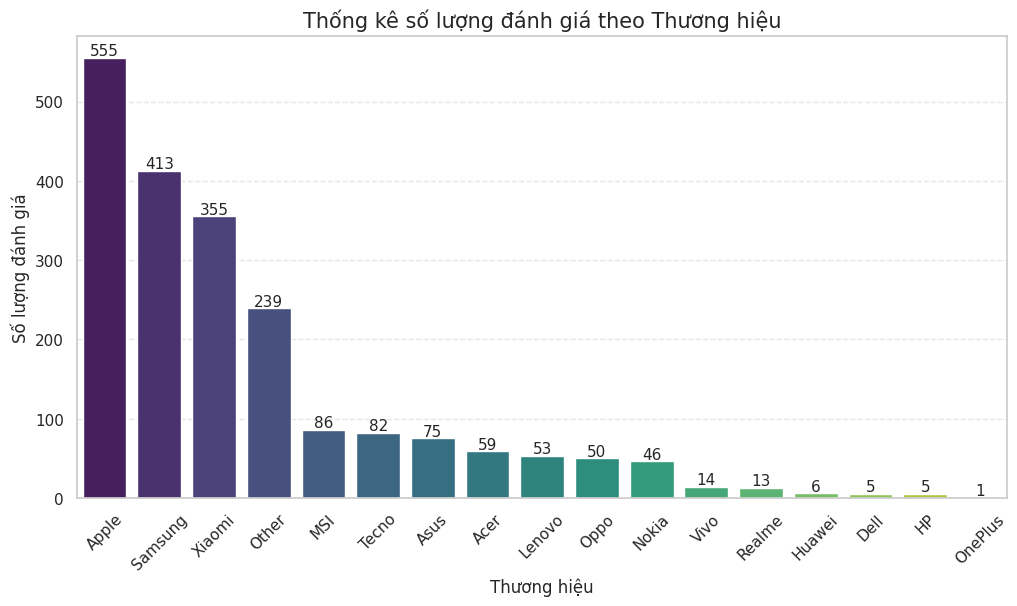

 NHẬN XÉT:
- Thương hiệu được quan tâm nhiều nhất: Apple (555 đánh giá)
- Tổng số thương hiệu có trong dữ liệu: 17


In [ ]:
# VẼ BIỂU ĐỒ THƯƠNG HIỆU
plt.figure(figsize=(12, 6))

# Đếm số lượng và sắp xếp từ cao xuống thấp
brand_counts = df_clean['brand'].value_counts()

# Vẽ Bar Chart
ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

plt.title('Thống kê số lượng đánh giá theo Thương hiệu', fontsize=15)
plt.xlabel('Thương hiệu', fontsize=12)
plt.ylabel('Số lượng đánh giá', fontsize=12)
plt.xticks(rotation=45) # Xoay tên hãng cho dễ đọc nếu quá dài

# Hiển thị con số cụ thể trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print(" NHẬN XÉT:")
print(f"- Thương hiệu được quan tâm nhiều nhất: {brand_counts.index[0]} ({brand_counts.values[0]} đánh giá)")
print(f"- Tổng số thương hiệu có trong dữ liệu: {len(brand_counts)}")

## Thống kê phân bố Điểm đánh giá

/tmp/ipython-input-4188653739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')


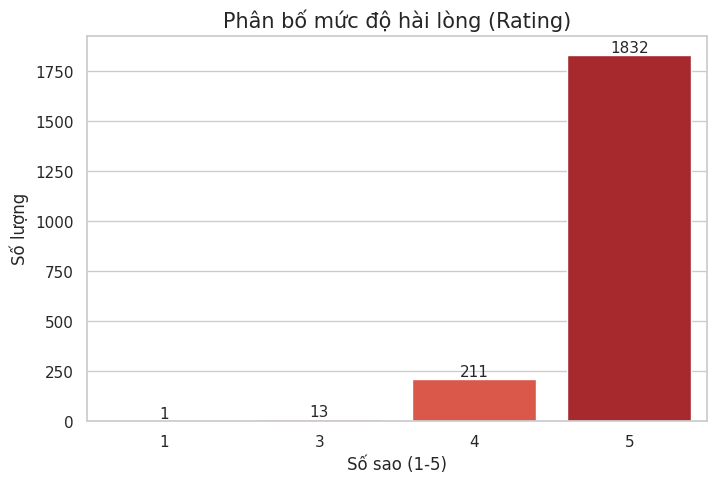

Tỷ lệ đánh giá 5 sao: 89.06%
CẢNH BÁO: Dữ liệu bị mất cân bằng nghiêm trọng (quá nhiều 5 sao).
   -> Mô hình phân loại cảm xúc có thể sẽ dự đoán toàn là 'Tích cực'.


In [ ]:
# VẼ BIỂU ĐỒ RATING (1-5 SAO)
plt.figure(figsize=(8, 5))

# Đếm số lượng từng mức sao
rating_counts = df_clean['rating'].value_counts().sort_index()

# Vẽ biểu đồ cột
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')

plt.title('Phân bố mức độ hài lòng (Rating)', fontsize=15)
plt.xlabel('Số sao (1-5)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số liệu
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Tính phần trăm
percent_5star = (len(df_clean[df_clean['rating']==5]) / len(df_clean)) * 100
print(f"Tỷ lệ đánh giá 5 sao: {percent_5star:.2f}%")
if percent_5star > 70:
    print("CẢNH BÁO: Dữ liệu bị mất cân bằng nghiêm trọng (quá nhiều 5 sao).")
    print("   -> Mô hình phân loại cảm xúc có thể sẽ dự đoán toàn là 'Tích cực'.")

## Thống kê độ dài bình luận

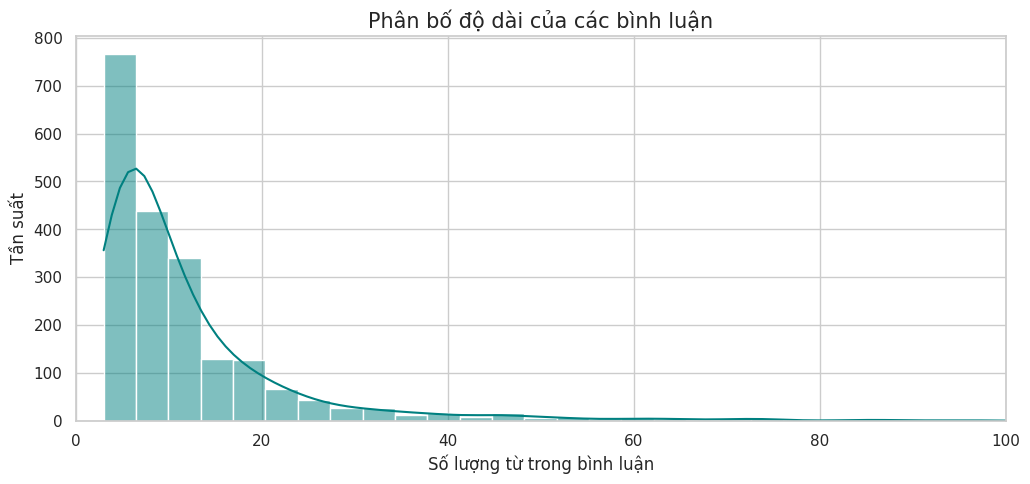

THỐNG KÊ ĐỘ DÀI:
- Trung bình: 12.1 từ/bình luận
- Ngắn nhất: 3 từ
- Dài nhất: 177 từ
- Đa số bình luận nằm trong khoảng 5-20 từ.


In [ ]:
# 1. TÍNH ĐỘ DÀI (SỐ TỪ)
# Chuyển nội dung về string để tránh lỗi
df_clean['content_str'] = df_clean['content'].astype(str)
# Đếm số từ (tách bằng khoảng trắng)
df_clean['word_count'] = df_clean['content_str'].apply(lambda x: len(x.split()))

# 2. VẼ BIỂU ĐỒ PHÂN BỐ (HISTOGRAM)
plt.figure(figsize=(12, 5))

# Vẽ Histogram kết hợp đường mật độ (KDE)
sns.histplot(df_clean['word_count'], bins=50, kde=True, color='teal')

plt.title('Phân bố độ dài của các bình luận', fontsize=15)
plt.xlabel('Số lượng từ trong bình luận', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xlim(0, 100) # Giới hạn hiển thị trục X đến 100 từ để nhìn cho rõ (vì có vài bài dài ngoằng làm biểu đồ bị xấu)

plt.show()

# 3. THỐNG KÊ CƠ BẢN
avg_len = df_clean['word_count'].mean()
max_len = df_clean['word_count'].max()
min_len = df_clean['word_count'].min()

print(f"THỐNG KÊ ĐỘ DÀI:")
print(f"- Trung bình: {avg_len:.1f} từ/bình luận")
print(f"- Ngắn nhất: {min_len} từ")
print(f"- Dài nhất: {max_len} từ")
print("- Đa số bình luận nằm trong khoảng 5-20 từ.")

## WORD FREQUENCY

/tmp/ipython-input-3222053386.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='viridis')


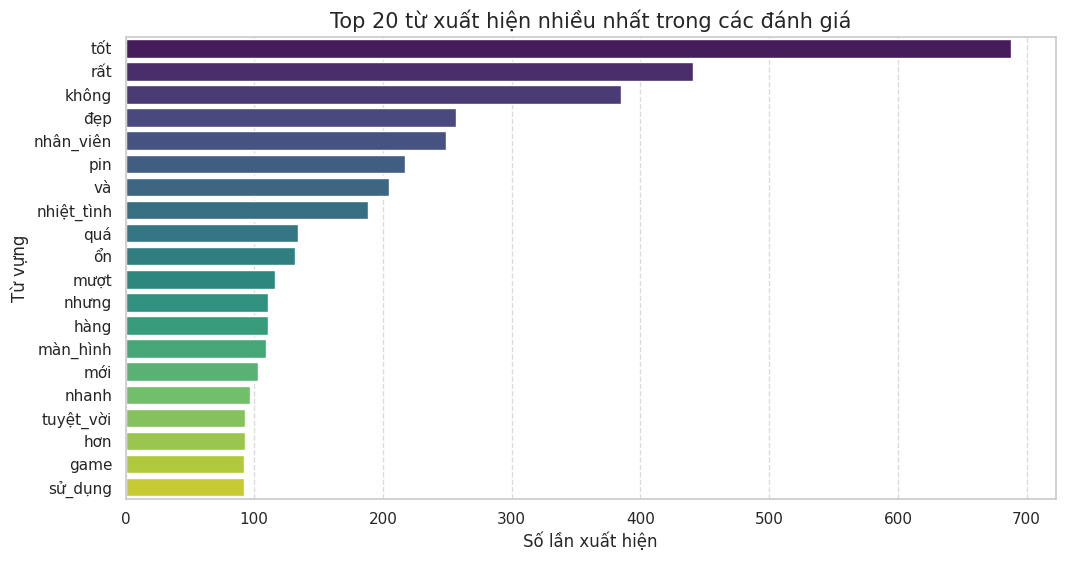

--- NHẬN XÉT SƠ BỘ ---
- Những từ nằm trên cùng là những vấn đề khách hàng quan tâm nhất (VD: pin, máy, màn_hình...).
- Nếu thấy các từ vô nghĩa (như: thì, là, mà...) xuất hiện nhiều, cần quay lại bước Tiền xử lý để bổ sung Stopwords.


In [ ]:
if 'all_words' in locals():
    # 1. Đếm số lần xuất hiện của từng từ
    word_counts = Counter(all_words)

    # 2. Lấy 20 từ xuất hiện nhiều nhất
    top_n = 20
    most_common_words = word_counts.most_common(top_n)

    # 3. Chuyển thành DataFrame để vẽ
    df_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # 4. Vẽ biểu đồ cột
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=df_freq, palette='viridis')
    plt.title(f'Top {top_n} từ xuất hiện nhiều nhất trong các đánh giá', fontsize=15)
    plt.xlabel('Số lần xuất hiện', fontsize=12)
    plt.ylabel('Từ vựng', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    print("--- NHẬN XÉT SƠ BỘ ---")
    print("- Những từ nằm trên cùng là những vấn đề khách hàng quan tâm nhất (VD: pin, máy, màn_hình...).")
    print("- Nếu thấy các từ vô nghĩa (như: thì, là, mà...) xuất hiện nhiều, cần quay lại bước Tiền xử lý để bổ sung Stopwords.")
else:
    print("[LỖI] Chưa tìm thấy biến 'all_words'. Hãy chạy đoạn code tạo danh sách từ ở trên trước!")

## WORDCLOUD TỔNG QUÁT

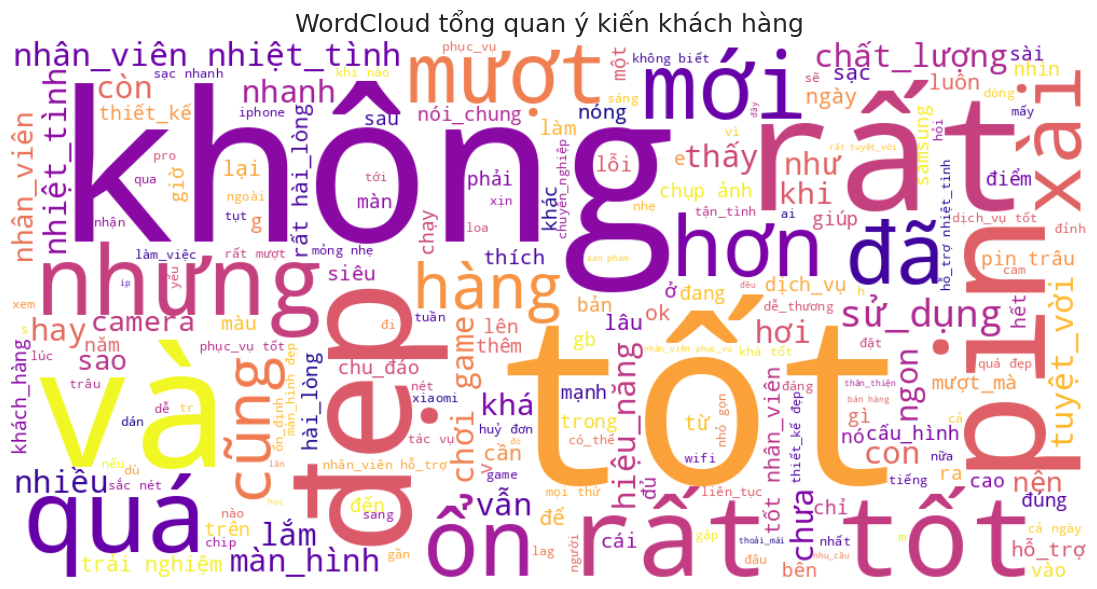

In [ ]:
# Kiểm tra xem biến df_clean đã tồn tại chưa
if 'df_clean' in locals():
    # 1. Nối lại thành một chuỗi văn bản dài
    # Chuyển về string để tránh lỗi nếu có dữ liệu không phải chuỗi
    text_corpus = " ".join(df_clean['content_cleaned'].astype(str))

    # 2. Tạo WordCloud
    wc = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='plasma',      # Chọn tông màu nóng
        max_words=200,          # Chỉ hiện 200 từ to nhất
        contour_width=3,
        contour_color='steelblue'
    ).generate(text_corpus)

    # 3. Hiển thị
    plt.figure(figsize=(14, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off') # Tắt trục tọa độ cho đẹp
    plt.title('WordCloud tổng quan ý kiến khách hàng', fontsize=18)
    plt.show()
else:
    print("[ERROR] Chưa có dữ liệu 'df_clean'. Hãy chạy các Cell trước đó (Tiền xử lý & EDA Cell 1) trước.")

CHIA CỤM VÀ GÁN NHÃN

In [ ]:
import pandas as pd
import numpy as np
import re
import os
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# 1. TỪ ĐIỂN TỪ KHÓA
TOPIC_DEFINITIONS = {
    "Pin & Sạc": ["pin", "sạc", "tụt", "trâu", "nhanh", "nóng", "mah", "hết", "onscreen", "day", "lâu", "yếu"],
    "Màn hình & Hiển thị": ["màn", "hình", "nét", "ám", "đẹp", "tần", "số", "quét", "120hz", "nhòe", "oled", "lcd", "hiển", "thị", "màu"],
    "Camera & Chụp ảnh": ["cam", "camera", "chụp", "ảnh", "nét", "video", "rung", "xấu", "mờ", "selfie", "pixel", "zoom"],
    "Hiệu năng & Game": ["game", "lag", "giật", "mượt", "chip", "nóng", "đơ", "treo", "liên", "quân", "fps", "snapdragon", "xử", "lý", "mạnh"],
    "Thiết kế & Ngoại hình": ["thiết", "kế", "mỏng", "nhẹ", "cầm", "màu", "lưng", "viền", "xước", "sang", "nhựa", "kính", "đẹp", "ngoại", "hình"],
    "Dịch vụ & CSKH": ["nhân", "viên", "tư", "vấn", "thái", "độ", "bảo", "hành", "giao", "shop", "phục", "vụ", "care", "hỗ", "trợ", "các em"],

    # NHÓM TỪ KHÓA TÀI CHÍNH
    "Giá cả & Khuyến mãi": [
        "giá", "rẻ", "đắt", "hợp", "lý", "tiền", "giảm", "khuyến", "mãi", "sale", "thu", "cũ",
        "thu nhập", "túi tiền", "kinh tế", "lương", "chi phí", "mắc", "tầm giá", "ví"
    ]
}

# 2. XỬ LÝ DỮ LIỆU
if 'work_dir' not in globals(): work_dir = '.'
INPUT_FILE = os.path.join(work_dir, 'data_preprocessed.xlsx') # Sử dụng file đã tiền xử lý
OUTPUT_FILE = 'data_final_chinh_xac_100.csv'

# Load Data
try:
    if INPUT_FILE.endswith('.csv'): df = pd.read_csv(INPUT_FILE)
    else: df = pd.read_excel(INPUT_FILE)
except:
    df = pd.read_csv(INPUT_FILE, encoding='utf-16', sep='\t')

if not df.empty:
    col_text = next((c for c in df.columns if 'content_cleaned' in c.lower() or 'content' in c.lower() or 'comment' in c.lower()), 'content_cleaned')

    # BƯỚC 1: WORD2VEC + K-MEANS (ĐỂ LẤY NHÃN CHO CÂU KHÔNG TỪ KHÓA)
    def simple_tokenize(text):
        if not isinstance(text, str): return []
        text = text.lower()
        text = re.sub(r'[\W_]+', ' ', text) # Sửa regex để giữ các từ đã nối bằng gạch dưới
        return text.split()

    sentences = df[col_text].apply(simple_tokenize).tolist()

    print("Training Word2Vec...")
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, seed=42)

    def get_vec(tokens):
        vecs = [w2v_model.wv[w] for w in tokens if w in w2v_model.wv]
        return np.mean(vecs, axis=0) if vecs else np.zeros(100)

    X_vecs = np.array([get_vec(s) for s in sentences])

    print("Clustering...")
    kmeans = KMeans(n_clusters=14, init='k-means++', random_state=42, n_init=10).fit(X_vecs) # Thêm n_init

    # Mapping sơ bộ cho cụm (để dùng khi không có từ khóa nào)
    cluster_labels_base = {}
    for i in range(14):
        center = kmeans.cluster_centers_[i]
        sim_words = [w[0] for w in w2v_model.wv.most_similar([center], topn=10)]
        # Map đơn giản
        best = "Đánh giá chung"
        for t, kws in TOPIC_DEFINITIONS.items():
            if any(w in kws for w in sim_words): best = t; break
        cluster_labels_base[i] = best

    df['Cluster_Base'] = kmeans.labels_

    # BƯỚC 2: LOGIC "BÀN TAY SẮT" (STRICT LOGIC)
    print("Đang áp dụng logic kiểm duyệt nghiêm ngặt...")

    def get_final_label(row):
        text = str(row[col_text]).lower()

        # 1. QUÉT TỪ KHÓA
        found_topics = set()
        for topic, kws in TOPIC_DEFINITIONS.items():
            for kw in kws:
                # Dùng regex để bắt chính xác từ (tránh bắt nhầm từ con)
                # VD: bắt "giá" nhưng không bắt "đánh giá" nếu muốn kỹ hơn
                if kw in text:
                    found_topics.add(topic)
                    break # Xong topic này

        # 2. RA QUYẾT ĐỊNH
        if len(found_topics) > 0:
            # NẾU TÌM THẤY TỪ KHÓA -> CHỈ DÙNG TỪ KHÓA (BỎ QUA WORD2VEC ĐOÁN MÒ)
            # Đây là bước chặn việc gán "Camera" cho câu nói về "Thu nhập"
            return ", ".join(sorted(found_topics))
        else:
            # CHỈ KHI KHÔNG CÓ TỪ KHÓA NÀO -> MỚI TIN VÀO WORD2VEC (AI ĐOÁN)
            cluster_id = row['Cluster_Base']
            predicted = cluster_labels_base.get(cluster_id, "Đánh giá chung")
            return predicted

    df['Topic_Label_Final'] = df.apply(get_final_label, axis=1)

    # KIỂM TRA LẠI CÂU CỦA BẠN
    check_kws = ["thu nhập", "tầm giá", "ví tiền"]
    print("\n--- KIỂM TRA LẠI CÁC CÂU VỀ TÀI CHÍNH ---")
    for kw in check_kws:
        sample = df[df[col_text].str.contains(kw, case=False, na=False)].head(1)
        if not sample.empty:
            print(f"- Có từ '{kw}' -> Nhãn: {sample.iloc[0]['Topic_Label_Final']}")
            print(f"  Nội dung: {sample.iloc[0][col_text][:60]}...")

    df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
    print(f"\nXONG. File chuẩn: {OUTPUT_FILE}")

else:
    print("No data.")

Training Word2Vec...
Clustering...
Đang áp dụng logic kiểm duyệt nghiêm ngặt...

--- KIỂM TRA LẠI CÁC CÂU VỀ TÀI CHÍNH ---
- Có từ 'thu nhập' -> Nhãn: Camera & Chụp ảnh, Giá cả & Khuyến mãi
  Nội dung: tôi thấy rất phù hợp với những người có thu nhập trung bình...

XONG. File chuẩn: data_final_chinh_xac_100.csv


WORDCLOUD CỦA CÁC CỤM

=== TẠO WORDCLOUD ===
1. Đang tạo WordCloud tổng quan...


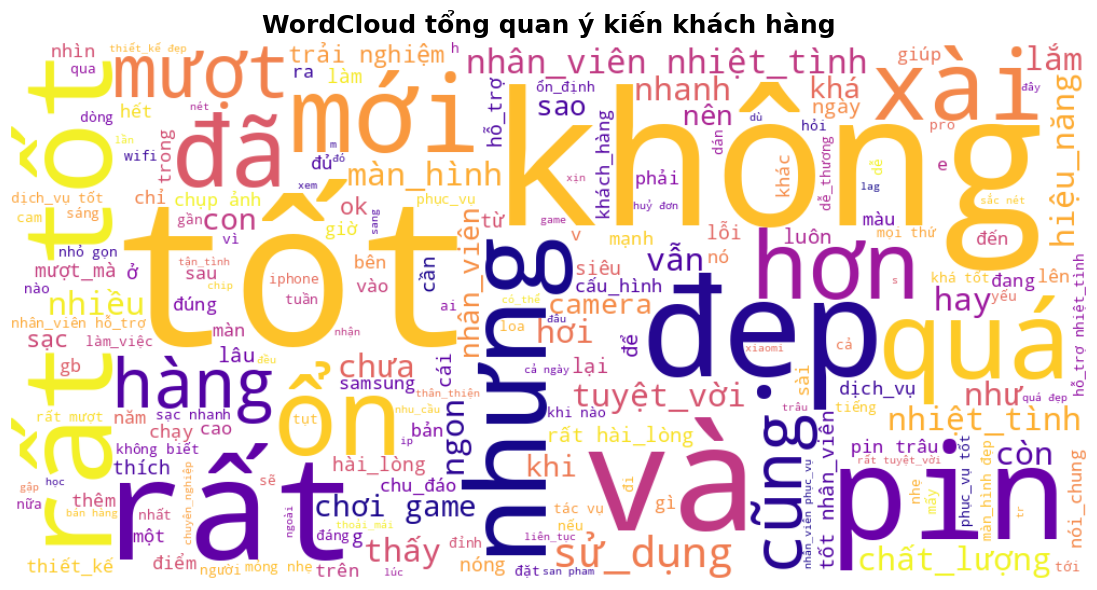


2. Đang tạo WordCloud chi tiết cho từng nhóm chủ đề...


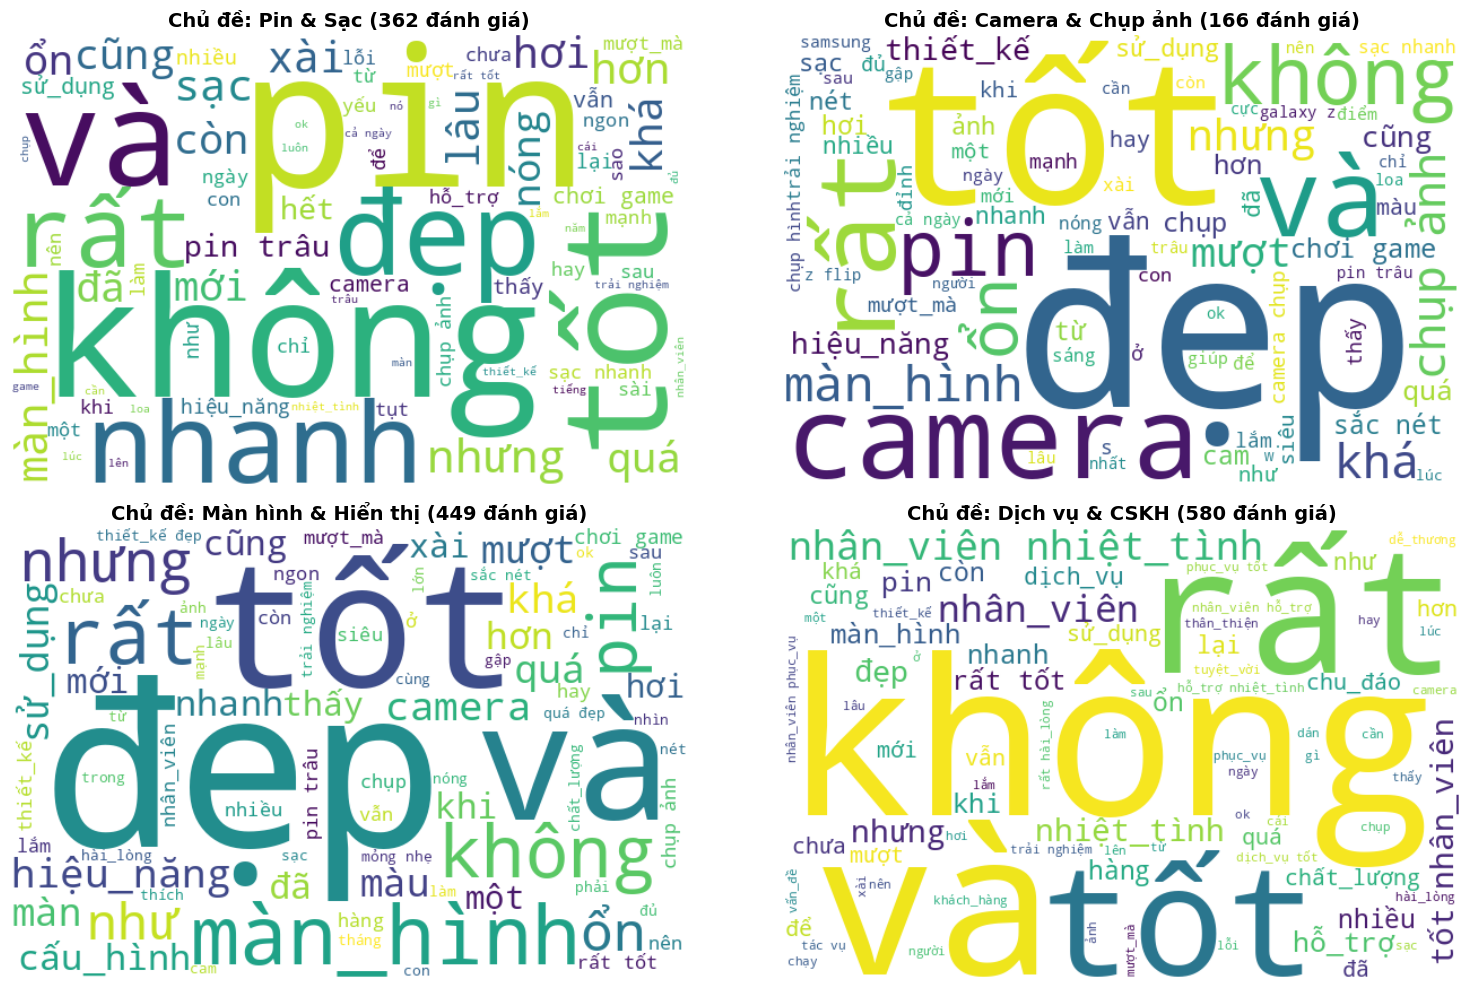

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. LOAD DỮ LIỆU ---
# Đảm bảo biến df đã được load
if 'df' not in locals():
    file_path = 'data_final_chinh_xac_100.csv'
    try:
        df = pd.read_csv(file_path)
    except:
        df = pd.read_excel(file_path)

# Đảm bảo dữ liệu là chuỗi
df['content_cleaned'] = df['content_cleaned'].astype(str)

print("=== TẠO WORDCLOUD ===")

# --- 2. TẠO WORDCLOUD TỔNG QUAN ---
print("1. Đang tạo WordCloud tổng quan...")
text_corpus = " ".join(df['content_cleaned'])

wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',      # Tông màu nóng
    max_words=200,          # 200 từ nổi bật nhất
    contour_width=3,
    contour_color='steelblue'
).generate(text_corpus)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud tổng quan ý kiến khách hàng', fontsize=18, fontweight='bold')
plt.show()

# --- 3. TẠO WORDCLOUD CHO TỪNG CỤM CHỦ ĐỀ (Data Phân Cụm) ---
print("\n2. Đang tạo WordCloud chi tiết cho từng nhóm chủ đề...")

# Danh sách các chủ đề quan trọng cần soi kỹ
target_topics = ["Pin & Sạc", "Camera & Chụp ảnh", "Màn hình & Hiển thị", "Dịch vụ & CSKH"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, topic in enumerate(target_topics):
    # Lọc các dòng thuộc chủ đề này
    subset = df[df['Topic_Label_Final'].str.contains(topic, case=False, na=False)]
    text_topic = " ".join(subset['content_cleaned'])

    if len(text_topic.strip()) > 0:
        wc_topic = WordCloud(
            width=600, height=400,
            background_color='white',
            colormap='viridis', # Tông màu khác để phân biệt
            max_words=80
        ).generate(text_topic)

        axes[i].imshow(wc_topic, interpolation='bilinear')
        axes[i].set_title(f'Chủ đề: {topic} ({len(subset)} đánh giá)', fontsize=14, fontweight='bold')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, "Không có dữ liệu", ha='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

ĐÁNH GIÁ TRỌNG SỐ

In [ ]:
import pandas as pd
import numpy as np
import os
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# --- CẤU HÌNH ---
if 'work_dir' not in locals(): work_dir = '.'
INPUT_FILE = 'data_final_chinh_xac_100.csv'
MODEL_OUTPUT = os.path.join(work_dir, 'word2vec.model')
VECTOR_OUTPUT = os.path.join(work_dir, 'X_word2vec_weighted.npy')

print("=== BẮT ĐẦU QUY TRÌNH VECTOR HÓA LẠI TỪ ĐẦU (FIX LỖI) ===")

# 1. LOAD DỮ LIỆU
if os.path.exists(INPUT_FILE):
    df = pd.read_csv(INPUT_FILE)
    # Đảm bảo cột content_cleaned là chuỗi và không rỗng
    df['content_cleaned'] = df['content_cleaned'].astype(str).fillna('')
    # Lọc bỏ các dòng quá ngắn (dưới 2 từ) để tránh nhiễu
    df = df[df['content_cleaned'].apply(lambda x: len(x.split()) > 1)].reset_index(drop=True)

    texts = df['content_cleaned'].tolist()
    print(f"[INFO] Đã load {len(texts)} dòng dữ liệu sạch.")
else:
    print(f"[ERROR] Không tìm thấy file {INPUT_FILE}")
    texts = []

if texts:
    # 2. TRAIN LẠI WORD2VEC
    print("[INFO] Đang chuẩn bị dữ liệu train Word2Vec...")
    sentences = [t.split() for t in texts]

    print(f"   -> Mẫu câu đầu tiên: {sentences[0]}")

    print("[INFO] Đang train lại Word2Vec (Epochs=30, Min_count=1)...")
    # Tăng epochs lên 30 để mô hình học kỹ hơn
    # sg=1 (Skip-gram) thường tốt hơn cho dữ liệu ít
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=30, sg=1, seed=42)
    w2v_model.save(MODEL_OUTPUT)
    print("[SUCCESS] Đã train và lưu word2vec.model mới.")

    # 3. TÍNH TF-IDF WEIGHTS
    print("[INFO] Đang tính trọng số TF-IDF...")
    tfidf = TfidfVectorizer()
    tfidf.fit(texts)
    # Tạo từ điển {từ: trọng_số_idf}
    word2weight = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

    # 4. TẠO VECTOR TRUNG BÌNH CÓ TRỌNG SỐ (WEIGHTED AVERAGE)
    print("[INFO] Đang tạo ma trận vector...")
    X_weighted = []
    dim = w2v_model.vector_size

    for text in texts:
        words = text.split()
        vecs = []
        weights = []

        for w in words:
            if w in w2v_model.wv and w in word2weight:
                vecs.append(w2v_model.wv[w])
                weights.append(word2weight[w])

        if len(vecs) > 0:
            # Công thức: Tổng(Vector * Trọng_số) / Tổng(Trọng_số)
            weighted_avg = np.average(vecs, axis=0, weights=weights)
            X_weighted.append(weighted_avg)
        else:
            X_weighted.append(np.zeros(dim))

    X_weighted = np.array(X_weighted)

    # 5. KIỂM TRA CHẤT LƯỢNG
    variance = np.std(X_weighted)
    print("-" * 30)
    print(f"KẾT QUẢ KIỂM TRA:")
    print(f"   - Kích thước ma trận: {X_weighted.shape}")
    print(f"   - Độ lệch chuẩn (Variance): {variance:.6f}")

    if variance < 0.001:
        print("LỖI NGHIÊM TRỌNG: Các vector vẫn giống hệt nhau. Hãy kiểm tra lại dữ liệu đầu vào!")
    else:
        print("THÀNH CÔNG: Các vector đã có sự phân hóa tốt.")
        np.save(VECTOR_OUTPUT, X_weighted)
        print(f"[DONE] Đã lưu file vector chuẩn tại: {VECTOR_OUTPUT}")

        # Lưu lại file data tương ứng để đảm bảo đồng bộ index
        df.to_csv('data_final_chinh_xac_100.csv', index=False)
        print("[INFO] Đã lưu file data đồng bộ: data_final_chinh_xac_100.csv")

else:
    print("[ERROR] Không có dữ liệu để chạy.")

=== BẮT ĐẦU QUY TRÌNH VECTOR HÓA LẠI TỪ ĐẦU (FIX LỖI) ===
[INFO] Đã load 2015 dòng dữ liệu sạch.
[INFO] Đang chuẩn bị dữ liệu train Word2Vec...
   -> Mẫu câu đầu tiên: ['nhân_viên', 'đỉnh', 'và', 'tốt', 'đáng', 'đồng_tiền', 'bát', 'gạo', 'lt']
[INFO] Đang train lại Word2Vec (Epochs=30, Min_count=1)...
[SUCCESS] Đã train và lưu word2vec.model mới.
[INFO] Đang tính trọng số TF-IDF...
[INFO] Đang tạo ma trận vector...
------------------------------
KẾT QUẢ KIỂM TRA:
   - Kích thước ma trận: (2015, 100)
   - Độ lệch chuẩn (Variance): 0.212282
THÀNH CÔNG: Các vector đã có sự phân hóa tốt.
[DONE] Đã lưu file vector chuẩn tại: ./data_final/X_word2vec_weighted.npy
[INFO] Đã lưu file data đồng bộ: data_final_chinh_xac_100.csv


=== BẮT ĐẦU ĐÁNH GIÁ CHẤT LƯỢNG & PHÂN TÍCH ĐỐI SÁNH ===
1. Đang đọc dữ liệu từ: data_final_chinh_xac_100.csv
   -> Đã load 2015 dòng dữ liệu.
2. Đang đọc vector từ: ./data_final/X_word2vec_weighted.npy
   -> Đã load ma trận vector kích thước: (2015, 100)

4.3. KẾT QUẢ ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM
CHỦ ĐỀ                    | SỐ LƯỢNG   | ĐỘ NÉN (Thấp=Tốt)   
------------------------------------------------------------
Pin & Sạc                 | 362        | 0.1235
Màn hình & Hiển thị       | 429        | 0.1316
Camera & Chụp ảnh         | 166        | 0.1061
Hiệu năng & Game          | 374        | 0.1502
Thiết kế & Ngoại hình     | 473        | 0.1343
Dịch vụ & CSKH            | 583        | 0.1702
Giá cả & Khuyến mãi       | 202        | 0.1464
------------------------------------------------------------
ĐỘ NÉN TRUNG BÌNH (Compactness): 0.1375
ĐỘ TÁCH BIỆT TRUNG BÌNH (Separation): 0.0521 (Cao là tốt)

4.4. PHÂN TÍCH ĐỐI SÁNH: LOẠI SẢN PHẨM vs CHỦ ĐỀ
   (Phân tích dựa trên cột: 'cate

Topic,Pin & Sạc,Màn hình & Hiển thị,Camera & Chụp ảnh,Hiệu năng & Game,Thiết kế & Ngoại hình,Dịch vụ & CSKH,Giá cả & Khuyến mãi
category,,,,,,,
Laptop,13.30,16.51,1.61,17.89,20.18,21.56,8.94
Mobile,14.45,16.74,7.74,13.67,17.72,22.35,7.33
Tablet,11.35,15.28,4.37,14.41,19.21,25.76,9.61


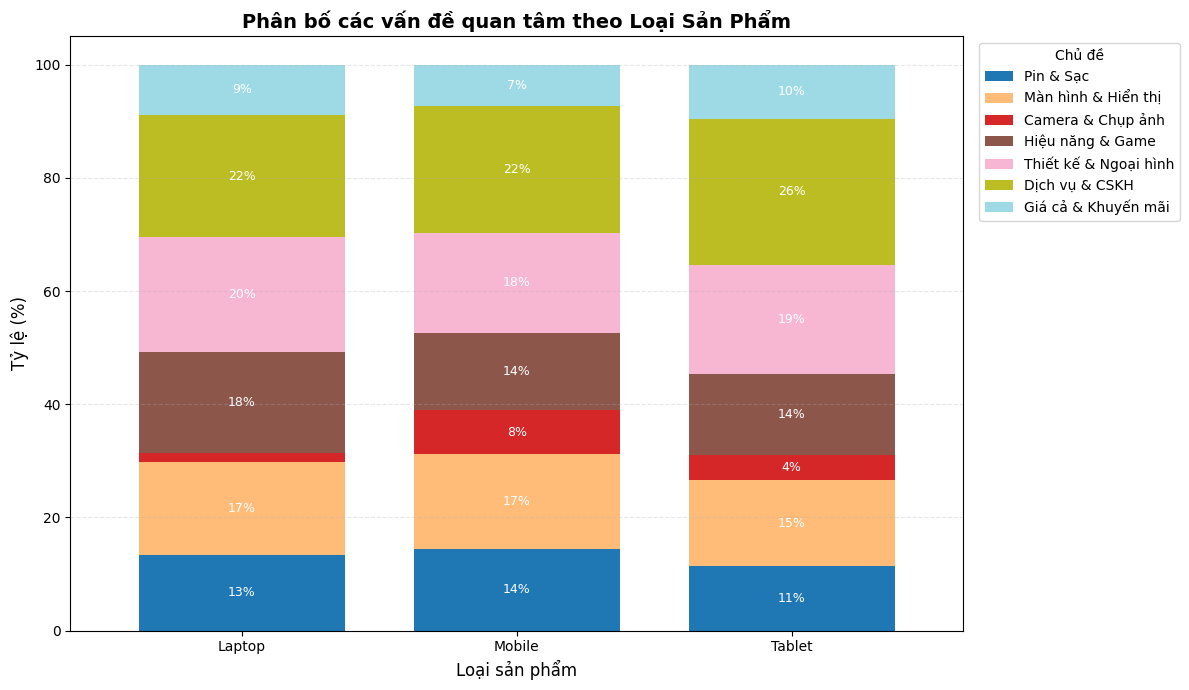

Hoàn tất phân tích.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances

print("=== BẮT ĐẦU ĐÁNH GIÁ CHẤT LƯỢNG & PHÂN TÍCH ĐỐI SÁNH ===")

# 1. LOAD DỮ LIỆU & VECTOR
DATA_FILE = 'data_final_chinh_xac_100.csv'
VECTOR_FILE = os.path.join(work_dir, 'X_word2vec_weighted.npy')

print(f"1. Đang đọc dữ liệu từ: {DATA_FILE}")
try:
    # Thử đọc CSV hoặc Excel
    if DATA_FILE.endswith('.csv'):
        df = pd.read_csv(DATA_FILE)
    else:
        df = pd.read_excel(DATA_FILE)
    print(f"   -> Đã load {len(df)} dòng dữ liệu.")
except Exception as e:
    print(f"Lỗi đọc file data: {e}")
    df = pd.DataFrame()

print(f"2. Đang đọc vector từ: {VECTOR_FILE}")
try:
    X_features = np.load(VECTOR_FILE)
    print(f"   -> Đã load ma trận vector kích thước: {X_features.shape}")
except Exception as e:
    print(f"Lỗi đọc file vector: {e}")
    X_features = np.array([])

# Kiểm tra tính đồng bộ
if len(df) != len(X_features):
    print(f"CẢNH BÁO: Số dòng Data ({len(df)}) và Vector ({len(X_features)}) không khớp.")
    min_len = min(len(df), len(X_features))
    df = df.iloc[:min_len]
    X_features = X_features[:min_len]
    print(f"   -> Đã tự động cắt còn {min_len} dòng để khớp.")

# 2. ĐÁNH GIÁ ĐỘ NÉN (COMPACTNESS) & TÁCH BIỆT (SEPARATION)
print("\n4.3. KẾT QUẢ ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM")

# Danh sách chủ đề cần đánh giá (để lọc bỏ các nhãn rác nếu có)
TARGET_TOPICS = [
    "Pin & Sạc", "Màn hình & Hiển thị", "Camera & Chụp ảnh",
    "Hiệu năng & Game", "Thiết kế & Ngoại hình",
    "Dịch vụ & CSKH", "Giá cả & Khuyến mãi"
]

if 'Topic_Label_Final' in df.columns:
    # Explode vì một comment có thể có nhiều nhãn (VD: "Pin & Sạc, Camera")
    # Chúng ta cần tách ra để tính toán cho từng nhóm chủ đề riêng biệt
    # Lưu ý: Index của df_exploded sẽ bị trùng lặp, cần giữ index gốc để map với vector
    df_exploded = df.assign(original_index=df.index, Topic=df['Topic_Label_Final'].str.split(', ')).explode('Topic')

    valid_centers = []
    total_compactness = 0
    count_topics = 0

    print(f"{'CHỦ ĐỀ':<25} | {'SỐ LƯỢNG':<10} | {'ĐỘ NÉN (Thấp=Tốt)':<20}")
    print("-" * 60)

    for topic in TARGET_TOPICS:
        # Lấy các dòng thuộc chủ đề này
        subset = df_exploded[df_exploded['Topic'] == topic]

        # Lấy index gốc để truy xuất vector tương ứng
        original_indices = subset['original_index'].values

        if len(original_indices) > 5:
            # Lấy vector
            vecs = X_features[original_indices]

            # Lọc bỏ vector toàn số 0 (nếu có) để không làm sai lệch kết quả
            valid_mask = ~np.all(vecs == 0, axis=1)
            vecs = vecs[valid_mask]

            if len(vecs) > 0:
                # Tính tâm cụm (Centroid)
                centroid = np.mean(vecs, axis=0).reshape(1, -1)

                # Tính độ nén (Trung bình khoảng cách từ điểm đến tâm)
                dist = np.mean(cosine_distances(vecs, centroid))

                print(f"{topic:<25} | {len(original_indices):<10} | {dist:.4f}")

                valid_centers.append(centroid[0])
                total_compactness += dist
                count_topics += 1

    print("-" * 60)
    if count_topics > 0:
        print(f"ĐỘ NÉN TRUNG BÌNH (Compactness): {total_compactness/count_topics:.4f}")

        # Tính độ tách biệt (Separation) - Khoảng cách giữa các tâm cụm
        if len(valid_centers) > 1:
            center_matrix = np.array(valid_centers)
            sep_dists = cosine_distances(center_matrix)
            # Lấy tam giác trên của ma trận khoảng cách (bỏ đường chéo 0)
            upper_indices = np.triu_indices(len(center_matrix), k=1)
            avg_separation = np.mean(sep_dists[upper_indices])
            print(f"ĐỘ TÁCH BIỆT TRUNG BÌNH (Separation): {avg_separation:.4f} (Cao là tốt)")
else:
    print("Không tìm thấy cột 'Topic_Label_Final'. Hãy kiểm tra lại file dữ liệu.")

# 3. PHÂN TÍCH ĐỐI SÁNH (Comparative Analysis)
print("\n4.4. PHÂN TÍCH ĐỐI SÁNH: LOẠI SẢN PHẨM vs CHỦ ĐỀ")

# Tự động tìm cột loại sản phẩm (Category)
col_prod = next((c for c in ['category', 'Product_Type', 'nhóm', 'loại'] if c in df.columns), None)

if col_prod and 'Topic_Label_Final' in df.columns:
    print(f"   (Phân tích dựa trên cột: '{col_prod}')")

    # Lọc bỏ 'Đánh giá chung' để biểu đồ tập trung vào vấn đề cụ thể
    df_chart = df_exploded[df_exploded['Topic'].isin(TARGET_TOPICS)]

    # Tạo bảng chéo % (Tính % theo hàng - tức là theo từng loại sản phẩm)
    cross_tab = pd.crosstab(df_chart[col_prod], df_chart['Topic'], normalize='index') * 100

    # Sắp xếp cột theo thứ tự mong muốn
    available_cols = [c for c in TARGET_TOPICS if c in cross_tab.columns]
    cross_tab = cross_tab[available_cols]

    # Hiển thị bảng số liệu
    print("\nBảng tỷ lệ phần trăm mối quan tâm (%):")
    display(cross_tab.round(2))

    # Vẽ biểu đồ Stacked Bar Chart
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20', width=0.75)

    plt.title('Phân bố các vấn đề quan tâm theo Loại Sản Phẩm', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ (%)', fontsize=12)
    plt.xlabel('Loại sản phẩm', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Chủ đề")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Hiển thị số % lên biểu đồ (chỉ hiện nếu > 3% cho đỡ rối)
    for c in ax.containers:
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 3 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

    plt.show()

    print("Hoàn tất phân tích.")
else:
    print("Không đủ dữ liệu để vẽ biểu đồ (Thiếu cột Category hoặc Topic Label).")

**TRAIN MODELS**

In [ ]:
import pandas as pd
import numpy as np
import os
import pickle

# Thư viện Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Thư viện Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# --- CẤU HÌNH ---
work_dir = 'data_final'
if not os.path.exists(work_dir): os.makedirs(work_dir)

# --- TỰ ĐỘNG TÌM FILE DATA ---
filename = 'data_final_chinh_xac_100.csv'
possible_paths = [
    filename,                               # 1. Tìm ở thư mục gốc
    os.path.join(work_dir, filename),       # 2. Tìm trong folder data_final
    os.path.join('/content', filename),     # 3. Tìm ở root Colab
    os.path.join('/content', work_dir, filename)
]

csv_path = None
for path in possible_paths:
    if os.path.exists(path):
        csv_path = path
        print(f"[INFO] Đã tìm thấy file dữ liệu tại: {csv_path}")
        break

if csv_path is None:
    raise FileNotFoundError(f"Không tìm thấy file '{filename}'. Hãy kiểm tra lại xem bạn đã upload file chưa!")

print("=== BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN CHUẨN HÓA ===")

# ==============================================================================
# 1. LOAD DỮ LIỆU & CHIA TẬP TRAIN/TEST CHUNG
# ==============================================================================
try:
    df = pd.read_csv(csv_path)
    # Lọc bỏ dòng không có nhãn hoặc content rỗng
    df = df.dropna(subset=['Topic_Label_Final', 'content_cleaned'])

    # Xử lý nhãn đa lớp (Multi-label)
    df['Topic_List'] = df['Topic_Label_Final'].astype(str).str.split(', ')
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(df['Topic_List'])
    classes = mlb.classes_
    print(f"[INFO] Số lượng chủ đề: {len(classes)} -> {classes}")

    # Chia tập Train/Test dựa trên TEXT GỐC ban đầu
    # Để đảm bảo cả ML và DL đều học và test trên cùng một tập dữ liệu
    X_text_train, X_text_test, y_train, y_test = train_test_split(
        df['content_cleaned'].astype(str), y, test_size=0.2, random_state=42
    )

    print(f"[INFO] Train size: {len(X_text_train)}, Test size: {len(X_text_test)}")

except Exception as e:
    print(f"[ERROR] Lỗi load data: {e}")
    exit()

# ==============================================================================
# 2. HUẤN LUYỆN NHÓM MACHINE LEARNING
# ==============================================================================
preds = {} # Dictionary lưu kết quả dự đoán

print("\n--- HUẤN LUYỆN MACHINE LEARNING (TF-IDF) ---")

# Định nghĩa các model trong Pipeline để tự động hóa việc vector hóa
ml_models = {
    "SVM": OneVsRestClassifier(LinearSVC(dual='auto', random_state=42)),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    "Multinomial NB": OneVsRestClassifier(MultinomialNB())
}

for name, model in ml_models.items():
    print(f"Running {name}...")
    # Tạo Pipeline: Text -> TF-IDF (Top 5000 từ) -> Model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))), # Dùng cả từ đơn và cụm 2 từ
        ('clf', model)
    ])

    pipeline.fit(X_text_train, y_train)
    preds[name] = pipeline.predict(X_text_test)

# ==============================================================================
# 3. HUẤN LUYỆN DEEP LEARNING (Bi-LSTM với Tokenizer)
# ==============================================================================
print("\n--- HUẤN LUYỆN DEEP LEARNING (Bi-LSTM) ---")

# 1. Tokenizer (Chỉ fit trên tập TRAIN để tránh data leakage)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text_train)

# 2. Chuyển đổi sang Sequence số
X_train_seq = tokenizer.texts_to_sequences(X_text_train)
X_test_seq = tokenizer.texts_to_sequences(X_text_test)

# 3. Padding (Độ dài cố định)
max_len = 100 # Tăng độ dài lên chút để hứng trọn câu review
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# 4. Xây dựng Model
vocab_size = len(tokenizer.word_index) + 1
model_dl = Sequential()
model_dl.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model_dl.add(Bidirectional(LSTM(64, return_sequences=False))) # Bi-LSTM
model_dl.add(Dropout(0.5))
model_dl.add(Dense(64, activation='relu'))
model_dl.add(Dense(len(classes), activation='sigmoid')) # Sigmoid cho Multi-label

model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train (Có EarlyStopping để tự dừng nếu không học thêm được)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_dl.fit(X_train_pad, y_train,
             validation_data=(X_test_pad, y_test),
             epochs=15, batch_size=32, verbose=1, callbacks=[early_stop])

# 6. Dự đoán
print("Predicting with Bi-LSTM...")
y_pred_prob = model_dl.predict(X_test_pad)
preds['Bi-LSTM'] = (y_pred_prob > 0.5).astype(int)

# ==============================================================================
# LƯU CÁC FILE CẤU HÌNH
print("\n--- ĐANG LƯU CÁC FILE CẤU HÌNH VÀO FOLDER DATA_FINAL ---")

# 1. Lưu Tokenizer (Để App xử lý text input giống hệt lúc train)
with open(os.path.join(work_dir, "tokenizer.pkl"), 'wb') as f:
    pickle.dump(tokenizer, f)
print(f"[OK] Đã lưu: tokenizer.pkl")

# 2. Lưu Model Deep Learning
model_dl.save(os.path.join(work_dir, "lstm_topic_model.h5"))
print(f"[OK] Đã lưu: lstm_topic_model.h5")

# 3. Lưu Topic Map (Mapping từ ID số sang tên nhãn: 0 -> Pin, 1 -> Camera...)
topic_map_dict = {i: label for i, label in enumerate(classes)}
with open(os.path.join(work_dir, "topic_map.pkl"), 'wb') as f:
    pickle.dump(topic_map_dict, f)
print(f"[OK] Đã lưu: topic_map.pkl")

print("\n=== HOÀN TẤT! HÃY CHẠY CELL ĐÁNH GIÁ ĐỂ XEM KẾT QUẢ VÀ SAU ĐÓ CHẠY APP ===")

[INFO] Đã tìm thấy file dữ liệu tại: data_final/data_final_chinh_xac_100.csv
=== BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN CHUẨN HÓA ===
[INFO] Số lượng chủ đề: 8 -> ['Camera & Chụp ảnh' 'Dịch vụ & CSKH' 'Giá cả & Khuyến mãi'
 'Hiệu năng & Game' 'Màn hình & Hiển thị' 'Pin & Sạc'
 'Thiết kế & Ngoại hình' 'Đánh giá chung']
[INFO] Train size: 1645, Test size: 412

--- HUẤN LUYỆN MACHINE LEARNING (TF-IDF) ---
Running SVM...
Running Logistic Regression...
Running Multinomial NB...

--- HUẤN LUYỆN DEEP LEARNING (Bi-LSTM) ---
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.1659 - loss: 0.5738 - val_accuracy: 0.2888 - val_loss: 0.4784
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.2994 - loss: 0.4434 - val_accuracy: 0.3617 - val_loss: 0.3996
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.4149 - loss: 0.3572 - val_accuracy: 0.3155 - val_loss: 0.3515
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.4493 - loss: 0.3075 - val_accuracy: 0.3738 - val_loss: 0.3231
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4964 - loss: 0.2681 - val_accuracy: 0.3859 - val_loss: 0.3054
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5609 - loss: 0.2332 - val_accuracy: 0.4029 - val_loss: 0.2921
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5706 - loss: 0.2100 - val_accuracy: 0.4126 - val_loss: 0.2744
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5843 - loss: 0.1907 - val_accuracy: 0.4320 - val_loss


--- ĐANG LƯU CÁC FILE CẤU HÌNH VÀO FOLDER DATA_FINAL ---
[OK] Đã lưu: tokenizer.pkl
[OK] Đã lưu: lstm_topic_model.h5
[OK] Đã lưu: topic_map.pkl

=== HOÀN TẤT! HÃY CHẠY CELL ĐÁNH GIÁ ĐỂ XEM KẾT QUẢ VÀ SAU ĐÓ CHẠY APP ===


**ĐÁNH GIÁ MÔ HÌNH**

=== BẢNG ĐÁNH GIÁ HIỆU NĂNG TOÀN DIỆN ===

Bảng số liệu chi tiết:


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.5170,0.8733,0.7007,0.7671
1,Logistic Regression,0.3058,0.8728,0.4355,0.5677
2,Multinomial NB,0.1772,0.8250,0.2638,0.3852
3,Bi-LSTM,0.4442,0.7773,0.6780,0.7058


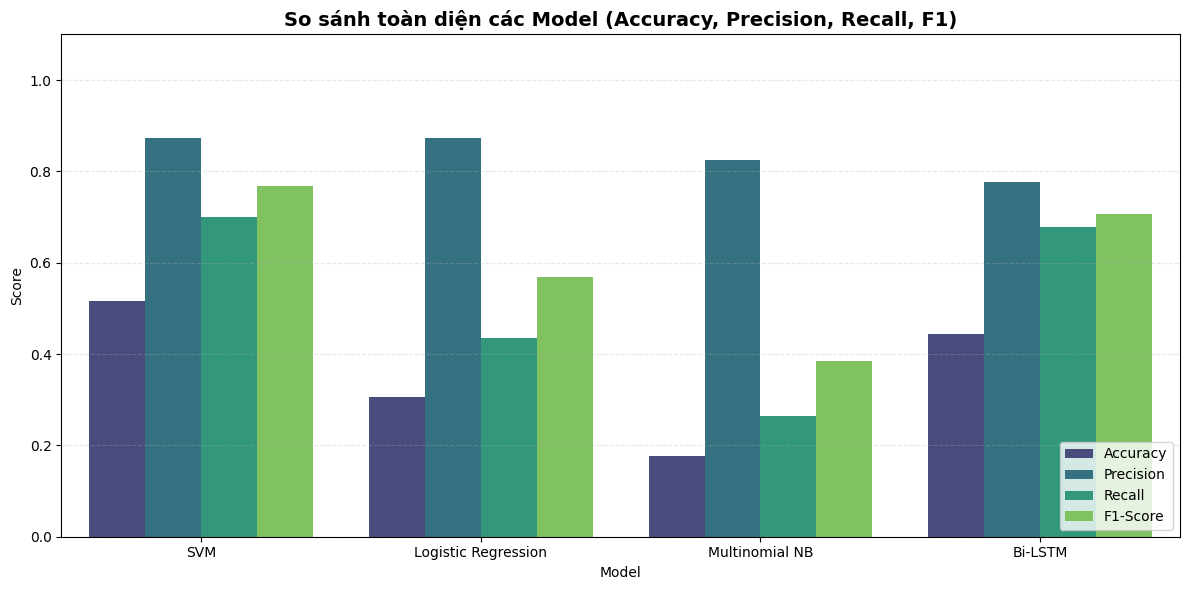


=== CONFUSION MATRIX SO SÁNH 4 MODEL ===


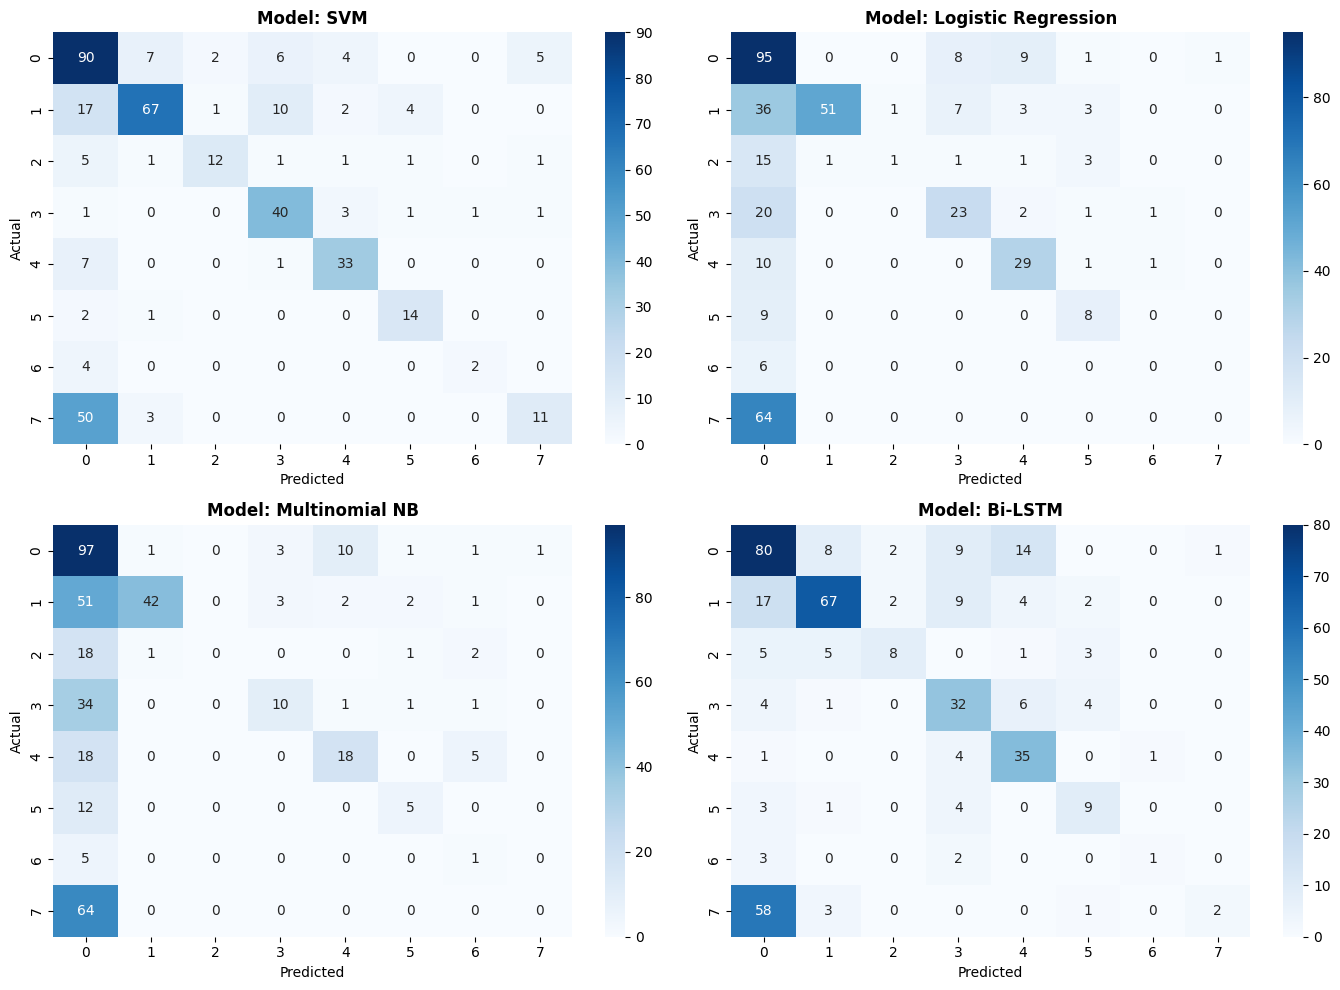

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ==============================================================================
# 5. ĐÁNH GIÁ & SO SÁNH
# ==============================================================================
print("=== BẢNG ĐÁNH GIÁ HIỆU NĂNG TOÀN DIỆN ===")
metrics_data = []

# Kiểm tra xem biến preds (dictionary chứa kết quả dự đoán các model) có tồn tại không
if 'preds' in locals() and 'y_test' in locals():

    # 1. TÍNH TOÁN CÁC CHỈ SỐ
    for name, y_p in preds.items():
        # Lưu ý: Nếu bài toán là Multi-label (nhiều nhãn 1 lúc), dùng average='micro' hoặc 'weighted'
        # Nếu là Multi-class (1 nhãn duy nhất), có thể dùng 'macro'
        acc = accuracy_score(y_test, y_p)
        prec = precision_score(y_test, y_p, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_p, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_p, average='weighted', zero_division=0)

        metrics_data.append([name, acc, prec, rec, f1])

    # Tạo DataFrame
    df_metrics = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

    # Chỉ format các cột số, tránh cột 'Model' là string gây lỗi
    print("\nBảng số liệu chi tiết:")
    display(df_metrics.style.highlight_max(axis=0, color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
                            .format("{:.4f}", subset=['Accuracy', 'Precision', 'Recall', 'F1-Score']))

    # 2. VẼ BIỂU ĐỒ SO SÁNH 4 CHỈ SỐ (GROUPED BAR CHART)
    # Chuyển đổi dữ liệu sang dạng dài (melt) để seaborn dễ vẽ nhóm
    df_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')
    plt.title('So sánh toàn diện các Model (Accuracy, Precision, Recall, F1)', fontsize=14, fontweight='bold')
    plt.ylim(0, 1.1)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. VẼ CONFUSION MATRIX CHO CẢ 4 MODEL (LƯỚI 2x2)
    print("\n=== CONFUSION MATRIX SO SÁNH 4 MODEL ===")

    # Chuẩn bị lưới vẽ 2x2
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten() # Làm phẳng mảng axes để dễ duyệt vòng lặp

    for i, (name, y_p) in enumerate(preds.items()):
        if i >= 4: break # Chỉ vẽ tối đa 4 model

        if y_test.ndim > 1: # Xử lý nếu y_test là one-hot encoded
            cm = confusion_matrix(y_test.argmax(axis=1), y_p.argmax(axis=1))
        else:
            cm = confusion_matrix(y_test, y_p)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Model: {name}', fontweight='bold')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

else:
    print("[ERROR] Không tìm thấy dữ liệu 'preds' hoặc 'y_test'. Hãy chạy cell huấn luyện trước!")

**APP**

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import requests
import gradio as gr
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ==============================================================================
# 1. CẤU HÌNH & LOAD TÀI NGUYÊN
# ==============================================================================
print("=== ĐANG KHỞI ĐỘNG APP (PHIÊN BẢN GIAO DIỆN MỚI) ===")

work_dir = 'data_final'
if not os.path.exists(work_dir): os.makedirs(work_dir)

# --- LOAD AI MODELS ---
try:
    # Load Model
    model_path = os.path.join(work_dir, "lstm_topic_model.h5")
    if 'lstm_net' not in globals():
        lstm_net = load_model(model_path)

    # Load Tokenizer
    tok_path = os.path.join(work_dir, "tokenizer.pkl")
    if 'tok' not in globals():
        with open(tok_path, 'rb') as f: tok = pickle.load(f)

    # Load Topic Map
    map_path = os.path.join(work_dir, "topic_map.pkl")
    if 'topic_map' not in globals():
        with open(map_path, 'rb') as f: topic_map = pickle.load(f)

    print("[OK] Đã load xong AI System.")
except Exception as e:
    print(f"[LỖI MODEL] {e} -> Hãy chạy code Train trước!")
    lstm_net, tok, topic_map = None, None, {}

# --- LOAD DATA TỰ ĐỘNG ---
csv_filename = 'data_final_chinh_xac_100.csv'
possible_paths = [csv_filename, os.path.join(work_dir, csv_filename), os.path.join('/content', csv_filename)]

data_file = None
for path in possible_paths:
    if os.path.exists(path):
        data_file = path
        break

if data_file:
    print(f"[INFO] Đang dùng data: {data_file}")
    DF_M2 = pd.read_csv(data_file, on_bad_lines='skip', engine='python')

    # 1. Map tên cột sản phẩm
    col_prod = next((c for c in DF_M2.columns if 'product' in c or 'name' in c), 'product')

    # 2. Map tên cột URL/Link gốc (Thường là 'source')
    col_url_origin = next((c for c in DF_M2.columns if 'source' in c or 'link' in c or 'url' in c), 'url')

    # 3. Map tên cột Nhãn
    col_label = next((c for c in DF_M2.columns if 'Topic_Label_Final' in c or 'label' in c.lower()), 'Topic_Label_Final')

    print(f"[INFO] Cột Link gốc: {col_url_origin}")

    # Xử lý dữ liệu
    DF_M2['search_name'] = DF_M2[col_prod].astype(str).str.lower()

    if col_label in DF_M2.columns:
        DF_M2[col_label] = DF_M2[col_label].astype(str)
    else:
        print(f"[CẢNH BÁO] Không tìm thấy cột label '{col_label}'.")

else:
    DF_M2 = None
    print("[LỖI] Không tìm thấy file data.")

# ==============================================================================
# 2. CÁC HÀM XỬ LÝ (HELPER FUNCTIONS)
# ==============================================================================

def fetch_product_image(url):
    """Lấy ảnh và giá"""
    default_img = "https://cdn2.cellphones.com.vn/insecure/rs:fill:358:358/q:90/plain/https://cellphones.com.vn/media/logo/logo-cellphones.png"
    if not isinstance(url, str) or len(url) < 5: return default_img, "Liên hệ"

    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers, timeout=1.5)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            img_tag = soup.find("meta", property="og:image")
            img_src = img_tag["content"] if img_tag else default_img

            price_tag = soup.select_one(".product__price--show") or soup.select_one(".box-info__box-price .price-now")
            price = price_tag.get_text().strip() if price_tag else "Xem tại web"
            return img_src, price
    except: pass
    return default_img, "Xem chi tiết"

def fetch_batch_data(df_batch):
    # Dùng cột 'url' (đã được chuẩn hóa tên ở bước groupby)
    urls = df_batch['url'].tolist()

    with ThreadPoolExecutor(max_workers=8) as executor:
        meta_data = list(executor.map(fetch_product_image, urls))

    results = []
    for (idx, row), (img, price) in zip(df_batch.iterrows(), meta_data):
        results.append({
            'name': row[col_prod],
            'url': row['url'],
            'score': row.get('score', 0),
            'count': row.get('t_count', 0),
            'img': img,
            'price': price
        })
    return results

def generate_html_grid(items, topic_name, total_found, is_partial=False):

    css = """
    <style>
        .h-scroll-container {
            display: flex; flex-direction: row; overflow-x: auto; gap: 20px; padding: 20px 5px;
            scroll-behavior: smooth; scrollbar-width: bold;
        }
        .h-card {
            flex: 0 0 260px; background: white; border: 1px solid #ddd; border-radius: 12px;
            overflow: hidden; display: flex; flex-direction: column; box-shadow: 0 4px 6px rgba(0,0,0,0.05);
            transition: transform 0.2s;
        }
        .h-card:hover { transform: translateY(-5px); box-shadow: 0 8px 15px rgba(0,0,0,0.1); }
        .h-card-img { height: 180px; display: flex; align-items: center; justify-content: center; padding: 10px; background: #fff; border-bottom: 1px solid #f0f0f0; }
        .h-card-body { padding: 12px; display: flex; flex-direction: column; flex-grow: 1; }

        .h-prod-title {
            margin: 0; font-size: 15px; height: 42px; overflow: hidden; line-height: 1.4;
            color: #333333 !important; /* Đen đậm */
            font-weight: 600;
        }
        .h-price {
            color: #d32f2f !important; /* Đỏ đậm */
            font-weight: bold; font-size: 18px; margin: 8px 0;
        }
        .h-info {
            display: flex; justify-content: space-between; font-size: 13px;
            color: #555555 !important; /* Xám đậm dễ đọc */
            margin-bottom: 10px;
        }
        .h-btn {
            margin-top: auto; display: block; text-align: center;
            background: #d32f2f; color: white !important; /* Chữ trắng trên nền đỏ */
            padding: 8px; border-radius: 4px; text-decoration: none;
            font-weight: bold; font-size: 13px;
        }
    </style>
    """

    js = """
    <script>
        function setupHorizontalScroll() {
            const containers = document.querySelectorAll('.h-scroll-container');
            containers.forEach(container => {
                container.onwheel = (evt) => {
                    if (evt.deltaY !== 0) { evt.preventDefault(); container.scrollLeft += evt.deltaY; }
                };
            });
        }
        setTimeout(setupHorizontalScroll, 1000);
        document.addEventListener('mouseover', setupHorizontalScroll);
    </script>
    """

    html = f"""
    {css}
    <div style='font-family: sans-serif;'>
        <div style='background: #e3f2fd; padding: 15px; border-radius: 8px; border-left: 5px solid #1976d2;'>
            <h3 style='margin:0; color: #0d47a1;'>🎯 Từ khóa thuộc nhãn: {topic_name}</h3>
            <p style='margin:5px 0 0 0; color: #555;'>
                {len(items)}/{total_found} sản phẩm phù hợp.
            </p>
        </div>
        <div class="h-scroll-container">
    """

    for item in items:
        html += f"""
        <div class="h-card">
            <div class="h-card-img">
                <img src='{item['img']}' style='max-height: 100%; max-width: 100%; object-fit: contain;' onerror="this.src='https://via.placeholder.com/260?text=No+Image';"/>
            </div>
            <div class="h-card-body">
                <h4 class="h-prod-title">{item['name']}</h4>
                <div class="h-price">{item['price']}</div>
                <div class="h-info">
                    <span style='color:#2e7d32; font-weight:bold;'>👍 {item['score']:.0f}% Tốt</span>
                    <span>({int(item['count'])})</span>
                </div>
                <a href='{item['url']}' target='_blank' class="h-btn">Xem chi tiết</a>
            </div>
        </div>
        """

    html += f"</div></div>{js}"
    return html

# ==============================================================================
# 3. LOGIC APP CHÍNH
# ==============================================================================
def search_and_display(user_query):
    if DF_M2 is None: yield "<h3>❌ Lỗi: Chưa load dữ liệu CSV</h3>"; return
    if lstm_net is None or tok is None: yield "<h3>❌ Lỗi: Chưa load Model. Hãy chạy code Train trước!</h3>"; return
    if not user_query: yield "<h3>Nhập từ khóa...</h3>"; return

    # 1. AI Predict
    seq = pad_sequences(tok.texts_to_sequences([user_query]), maxlen=100, padding='post')
    probs = lstm_net.predict(seq, verbose=0)
    pred_idx = int(np.argmax(probs))
    topic_name = topic_map.get(pred_idx, f"Topic {pred_idx}")

    # 2. Filter Logic
    df_filtered = DF_M2.copy()
    relevant = df_filtered[df_filtered[col_label].str.contains(topic_name, na=False, regex=False)]

    if relevant.empty:
        yield f"<h3>🔍 AI đoán là '{topic_name}' nhưng không tìm thấy sản phẩm nào.</h3>"; return

    # 3. Aggregate & Rank
    # Tạo cột 'url' mới từ cột gốc (source)
    candidates = relevant.groupby(col_prod).agg(
        t_count=(col_prod, 'count'),
        url=(col_url_origin, 'first')
    ).reset_index()

    total_counts = df_filtered[col_prod].value_counts()
    candidates['all_count'] = candidates[col_prod].map(total_counts)

    candidates = candidates[candidates['all_count'] >= 2]
    candidates['score'] = (candidates['t_count'] / candidates['all_count']) * 100

    top_products = candidates.sort_values(by='score', ascending=False).head(30)
    total_found = len(top_products)

    if total_found == 0: yield f"<h3>Chủ đề '{topic_name}' có dữ liệu nhưng ít review.</h3>"; return

    # 4. Yield Results
    first_batch_df = top_products.head(5)
    first_batch_items = fetch_batch_data(first_batch_df)
    yield generate_html_grid(first_batch_items, topic_name, total_found, is_partial=True)

    if total_found > 5:
        second_batch_df = top_products.iloc[5:]
        second_batch_items = fetch_batch_data(second_batch_df)
        full_items = first_batch_items + second_batch_items
        yield generate_html_grid(full_items, topic_name, total_found, is_partial=False)

# CHẠY APP
iface = gr.Interface(
    fn=search_and_display,
    inputs=gr.Textbox(label="🔍 Từ khóa", placeholder="VD: Laptop màn hình đẹp, iPhone pin trâu..."),
    outputs=gr.HTML(label="Kết quả"),
    title="🛍️ Hệ thống tìm kiếm thông minh",
    description="Nhập từ khóa sản phẩm bạn cần vào ô bên dưới",
    allow_flagging="never"
)

iface.launch(share=True, debug=True)

=== ĐANG KHỞI ĐỘNG APP (PHIÊN BẢN GIAO DIỆN MỚI) ===
[OK] Đã load xong AI System.
[INFO] Đang dùng data: data_final/data_final_chinh_xac_100.csv
[INFO] Cột Link gốc: source


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f9ea18a73ecb170cef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
